In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
import pickle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
!pip install ydata-profiling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/fifa_players.csv'
df = pd.read_csv(file_path)
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [ ]:
df.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

In [ ]:
df["value_euro"] = df["value_euro"].fillna(df["value_euro"].mean())

In [ ]:
df["wage_euro"] = df["wage_euro"].fillna(df["wage_euro"].mean())

In [ ]:
df["release_clause_euro"] = df["release_clause_euro"].fillna(df["release_clause_euro"].mean())

In [ ]:
df["national_team"] = df["national_team"].fillna(df["nationality"])

In [ ]:
df.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                           0
wage_euro                            0
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro                  0
national_team                        0
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

In [ ]:
df["national_rating"] = df["national_rating"].fillna(df["overall_rating"]-8)

In [ ]:
df["national_team_position"] = df["national_team_position"].fillna(df["positions"])

In [ ]:
df["national_jersey_number"] = df["national_jersey_number"].fillna(df["national_jersey_number"].mean())

In [ ]:
df.isnull().sum()

name                             0
full_name                        0
birth_date                       0
age                              0
height_cm                        0
weight_kgs                       0
positions                        0
nationality                      0
overall_rating                   0
potential                        0
value_euro                       0
wage_euro                        0
preferred_foot                   0
international_reputation(1-5)    0
weak_foot(1-5)                   0
skill_moves(1-5)                 0
body_type                        0
release_clause_euro              0
national_team                    0
national_rating                  0
national_team_position           0
national_jersey_number           0
crossing                         0
finishing                        0
heading_accuracy                 0
short_passing                    0
volleys                          0
dribbling                        0
curve               

In [ ]:
df.duplicated().sum()

0

In [ ]:
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile.to_notebook_iframe()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17954 non-null  float64
 11  wage_euro                      17954 non-null  float64
 12  preferred_foot                 17954 non-null 

In [ ]:
df.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [ ]:
fig = px.histogram(df, x="age", y="overall_rating", color_discrete_sequence=['red'], nbins=10, height=600)
fig.update_layout(
    title_text="Distribution of overall_rating by age",
    xaxis_title="age",
    yaxis_title="overall_rating",
    bargap=0.2
)
fig.show()

In [ ]:
fig = px.histogram(df, x="preferred_foot", y="overall_rating", color_discrete_sequence=['red'], nbins=10, height=600)
fig.update_layout(
    title_text="Distribution of overall_rating by preferred_foot",
    xaxis_title="preferred_foot",
    yaxis_title="overall_rating",
    bargap=0.2
)
fig.show()

In [ ]:
df_top10 = df.sort_values(by='marking', ascending=True).head(10)
fig = px.bar(df_top10, x='nationality', y='marking', height=400)
fig.update_layout(
    title_text="Top 10 nationalitys by marking ",
    xaxis_title="nationality",
    yaxis_title="marking ",
    width=1450
)
fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17954 non-null  float64
 11  wage_euro                      17954 non-null  float64
 12  preferred_foot                 17954 non-null 

In [ ]:
df = df.drop(columns='birth_date')

In [ ]:
df.columns

Index(['name', 'full_name', 'age', 'height_cm', 'weight_kgs', 'positions',
       'nationality', 'overall_rating', 'potential', 'value_euro', 'wage_euro',
       'preferred_foot', 'international_reputation(1-5)', 'weak_foot(1-5)',
       'skill_moves(1-5)', 'body_type', 'release_clause_euro', 'national_team',
       'national_rating', 'national_team_position', 'national_jersey_number',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [ ]:
encoder=LabelEncoder()
df['positions']=encoder.fit_transform(df['positions'])

In [ ]:
encoder=LabelEncoder()
df['nationality']=encoder.fit_transform(df['nationality'])

In [ ]:
encoder=LabelEncoder()
df['body_type']=encoder.fit_transform(df['body_type'])

In [ ]:
encoder=LabelEncoder()
df['national_team_position']=encoder.fit_transform(df['national_team_position'])

In [ ]:
encoder=LabelEncoder()
df['preferred_foot']=encoder.fit_transform(df['preferred_foot'])

In [ ]:
encoder=LabelEncoder()
df['national_team']=encoder.fit_transform(df['national_team'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   age                            17954 non-null  int64  
 3   height_cm                      17954 non-null  float64
 4   weight_kgs                     17954 non-null  float64
 5   positions                      17954 non-null  int64  
 6   nationality                    17954 non-null  int64  
 7   overall_rating                 17954 non-null  int64  
 8   potential                      17954 non-null  int64  
 9   value_euro                     17954 non-null  float64
 10  wage_euro                      17954 non-null  float64
 11  preferred_foot                 17954 non-null  int64  
 12  international_reputation(1-5)  17954 non-null 

In [ ]:
df.columns

Index(['name', 'full_name', 'age', 'height_cm', 'weight_kgs', 'positions',
       'nationality', 'overall_rating', 'potential', 'value_euro', 'wage_euro',
       'preferred_foot', 'international_reputation(1-5)', 'weak_foot(1-5)',
       'skill_moves(1-5)', 'body_type', 'release_clause_euro', 'national_team',
       'national_rating', 'national_team_position', 'national_jersey_number',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [ ]:
df['height_cm'] = df['height_cm'].astype(int)

In [ ]:
df['weight_kgs'] = df['weight_kgs'].astype(int)

In [ ]:
df['value_euro'] = df['value_euro'].astype(int)

In [ ]:
df['wage_euro'] = df['wage_euro'].astype(int)

In [ ]:
df['release_clause_euro'] = df['release_clause_euro'].astype(int)

In [ ]:
df['national_rating'] = df['national_rating'].astype(int)

In [ ]:
df['national_jersey_number'] = df['national_jersey_number'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   name                           17954 non-null  object
 1   full_name                      17954 non-null  object
 2   age                            17954 non-null  int64 
 3   height_cm                      17954 non-null  int64 
 4   weight_kgs                     17954 non-null  int64 
 5   positions                      17954 non-null  int64 
 6   nationality                    17954 non-null  int64 
 7   overall_rating                 17954 non-null  int64 
 8   potential                      17954 non-null  int64 
 9   value_euro                     17954 non-null  int64 
 10  wage_euro                      17954 non-null  int64 
 11  preferred_foot                 17954 non-null  int64 
 12  international_reputation(1-5)  17954 non-null  int64 
 13  w

In [ ]:
feature_cols =[ 'age', 'height_cm', 'weight_kgs', 'positions','nationality', 'potential', 'value_euro', 'wage_euro','preferred_foot', 'international_reputation(1-5)', 'weak_foot(1-5)','skill_moves(1-5)', 'body_type', 'release_clause_euro', 'national_team','national_rating', 'national_team_position', 'national_jersey_number','crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys','dribbling', 'curve', 'freekick_accuracy', 'long_passing','ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions','balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots','aggression', 'interceptions', 'positioning', 'vision', 'penalties','composure', 'marking', 'standing_tackle', 'sliding_tackle']
X = df[feature_cols]
y = df['overall_rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy_dt=accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
print("Accuracy:", accuracy*100)
print("Classification Report:\n", report)

Accuracy: 96.47299053276406
Classification Report:
               precision    recall  f1-score   support

          47       1.00      1.00      1.00        10
          48       1.00      1.00      1.00        10
          49       1.00      1.00      1.00        17
          50       1.00      1.00      1.00        33
          51       1.00      1.00      1.00        33
          52       1.00      1.00      1.00        51
          53       1.00      1.00      1.00        65
          54       1.00      1.00      1.00        82
          55       1.00      1.00      1.00        68
          56       1.00      1.00      1.00        97
          57       1.00      1.00      1.00       119
          58       1.00      1.00      1.00       142
          59       1.00      1.00      1.00       145
          60       0.99      0.99      0.99       188
          61       0.99      1.00      1.00       213
          62       1.00      1.00      1.00       247
          63       1.00      

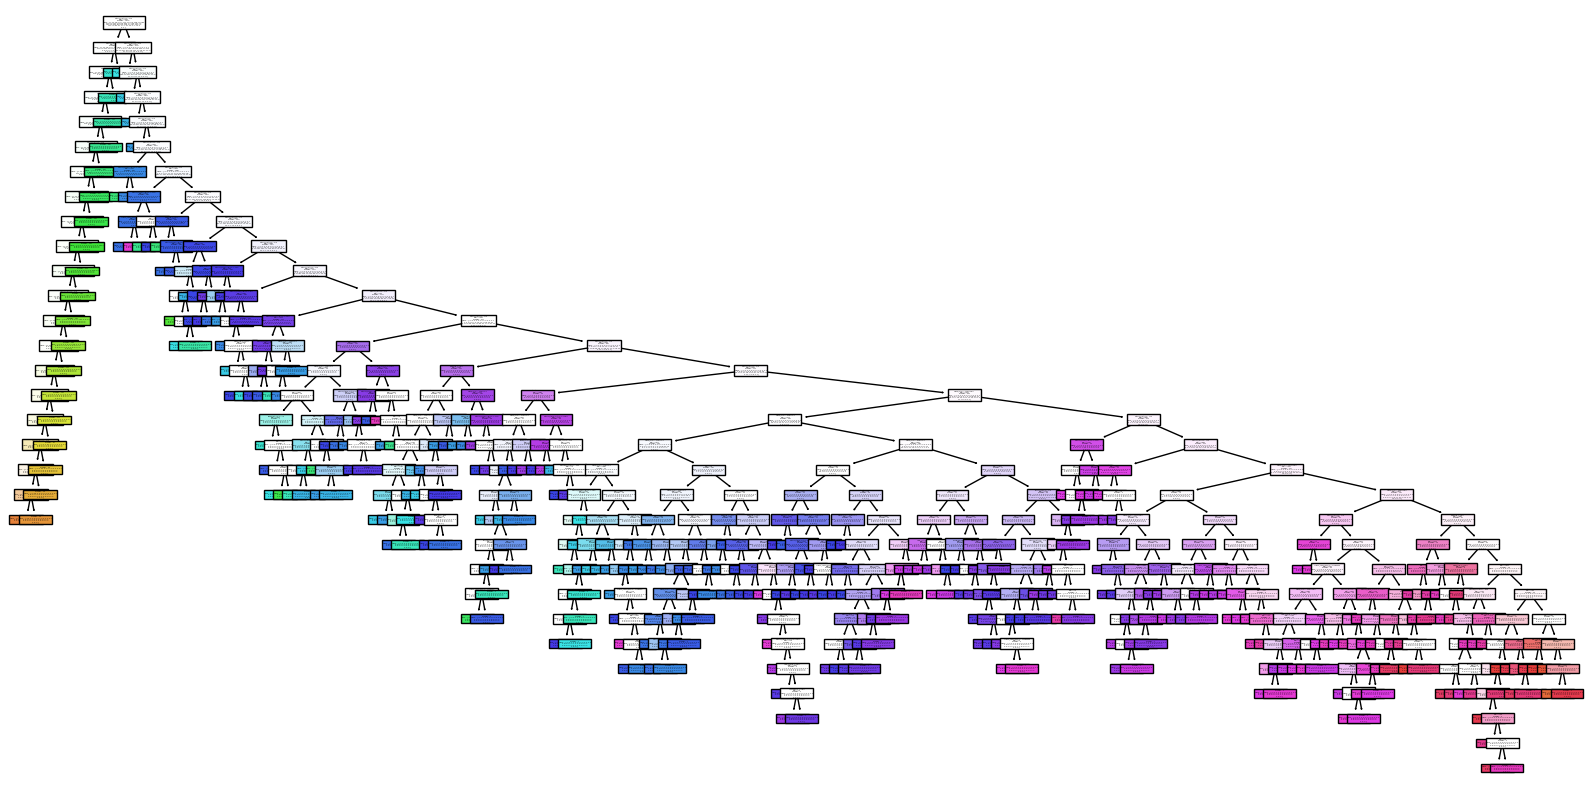

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns)
plt.show()

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_initial_accuracy = rf_clf.score(X_test, y_test)
rf_initial_accuracy=rf_initial_accuracy*100
print(f"Initial Random Forest Accuracy: {rf_initial_accuracy:.2f}")

Initial Random Forest Accuracy: 93.50


In [ ]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_predict= lg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_predict)
accuracy1=accuracy*100
accuracy_log_reg=accuracy1
print(f'Accuracy: {accuracy_log_reg}')

Accuracy: 2.7102283274549843


In [ ]:
y_prob = dt.predict_proba(X_test)[:, 1]

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

ValueError: multiclass format is not supported

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression')
plt.legend(loc='lower right')
plt.show()

In [ ]:
def compare_algorithms_accuracy(df, feature_cols, test_size=0.2, random_state=42):
    allAcc = {'Logistic Regression Accuracy': accuracy_log_reg,'Random Forest Classifier Accuracy': rf_initial_accuracy,'Decision Tree Accuracy': accuracy_dt*100}
    highest_accuracy = max(allAcc, key=allAcc.get)
    return f"The algorithm with the highest accuracy is: {highest_accuracy} with an accuracy of {allAcc[highest_accuracy]:.2f}%"
result = compare_algorithms_accuracy(df, feature_cols)
print(result)

The algorithm with the highest accuracy is: Decision Tree Accuracy with an accuracy of 96.47%


In [ ]:
with open('footballRate.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)